In [20]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

In [26]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

def synthwave_glitch(image_path):
    img = cv2.imread(image_path)
   # img = cv2.resize(img, (512, 512))  # Resize for style
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, _ = img.shape
    glitched = img.copy()

    # Convert to grayscale and apply color map (neon-like)
    gray = cv2.cvtColor(glitched, cv2.COLOR_RGB2GRAY)
    glitched = cv2.applyColorMap(gray, cv2.COLORMAP_MAGMA)  # Or COLORMAP_COOL/HOT

    # Channel misalignment
    glitched = glitched.astype(np.uint8)
    r, g, b = glitched[:, :, 2], glitched[:, :, 1], glitched[:, :, 0]
    g = np.roll(g, 3, axis=0)
    r = np.roll(r, -3, axis=1)
    glitched = np.stack([b, g, r], axis=2)

    # Scanlines
    for i in range(0, height, 4):
        glitched[i:i+1, :] = glitched[i:i+1, :] * 0.5

    # Horizontal distortion slices
    for _ in range(10):
        y = random.randint(0, height - 10)
        h = random.randint(2, 5)
        shift = random.randint(-20, 20)
        glitched[y:y+h] = np.roll(glitched[y:y+h], shift, axis=1)

    return glitched


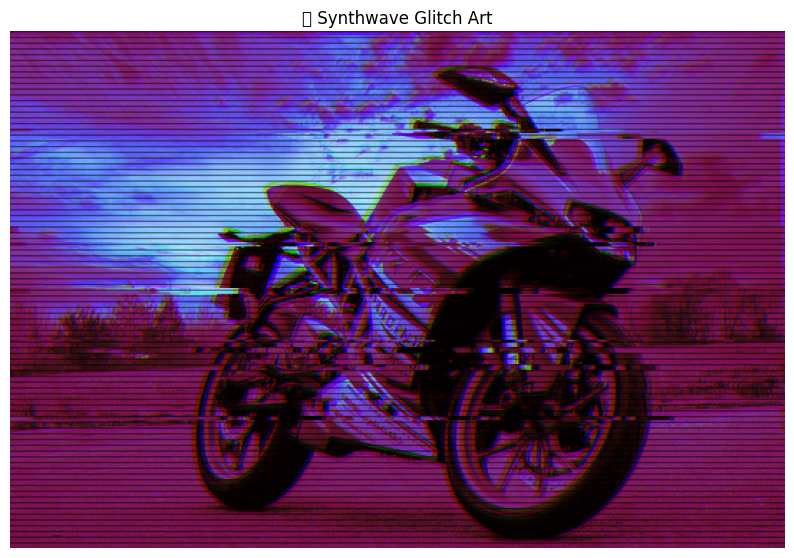

In [27]:
output = synthwave_glitch("duke.jpg")

plt.figure(figsize=(10, 10))
plt.imshow(output)
plt.axis('off')
plt.title("🌠 Synthwave Glitch Art")
plt.show()
